Imports and constants

In [1]:
import pandas as pd
import numpy as np
from sklearn import feature_selection as fs
import matplotlib.pyplot as plt

csv_features_path = 'csvs/pesa_signal_features.csv'

%matplotlib qt

LOADING THE DATA

We don't want peak frequencies here, they are wreaking havoc.

In [2]:
feature_names = ['AVG', 'PEAK', 'BOTTOM', 'STD',\
                 'delta_AVG', 'delta_PEAK', 'delta_BOTTOM', 'delta_STD',\
                 'tehta_AVG', 'tehta_PEAK', 'tehta_BOTTOM', 'tehta_STD',\
                 'alpha_AVG', 'alpha_PEAK', 'alpha_BOTTOM', 'alpha_STD',\
                 'beta_AVG', 'beta_PEAK', 'beta_BOTTOM', 'beta_STD',\
                 'gamma_AVG', 'gamma_PEAK', 'gamma_BOTTOM', 'gamma_STD']
id_columns = ['ID', 'VALENCE', 'AROUSAL']
useful_columns = id_columns + feature_names



data = pd.read_csv(csv_features_path, usecols=useful_columns)

features = data.drop(['ID', 'VALENCE', 'AROUSAL'], axis=1)
classes1 = data['VALENCE']
classes2 = data['AROUSAL']

features = features.to_numpy()

SELECTING BEST FEATURES

Some of the features (namely, peak frequencies) are too uniform to be used, due to the small value range:

In [3]:
filter = fs.VarianceThreshold(threshold=0.2)
features_reduced = filter.fit_transform(features)
feature_names_reduced = filter.get_feature_names_out(feature_names)

print(feature_names_reduced)

['PEAK' 'STD' 'delta_AVG' 'delta_PEAK' 'delta_BOTTOM' 'delta_STD'
 'tehta_AVG' 'tehta_PEAK' 'tehta_BOTTOM' 'alpha_AVG' 'alpha_PEAK'
 'alpha_STD']


Out of those features that are left, we choose five of the best:

In [4]:
selector = fs.SelectKBest(score_func=fs.mutual_info_classif, k=5)
selector.fit(features_reduced, classes1)
selected_features_valence = selector.get_feature_names_out(feature_names_reduced)

selector.fit(features_reduced, classes2)
selected_features_arousal = selector.get_feature_names_out(feature_names_reduced)

print(selected_features_valence)
print(selected_features_arousal)

['tehta_PEAK' 'tehta_BOTTOM' 'alpha_AVG' 'alpha_PEAK' 'alpha_STD']
['tehta_PEAK' 'tehta_BOTTOM' 'alpha_AVG' 'alpha_PEAK' 'alpha_STD']


EXAMINING BEST FEATURES
----

FEATURES FOR VALENCE DETECTION

In [11]:
valence_data = id_columns + selected_features_valence.tolist()
valence_f = data[valence_data]
valence_f = valence_f.drop(['AROUSAL'], axis=1)
positives = valence_f.loc[valence_f['VALENCE']==0]
negatives = valence_f.loc[valence_f['VALENCE']==1]

Plotting

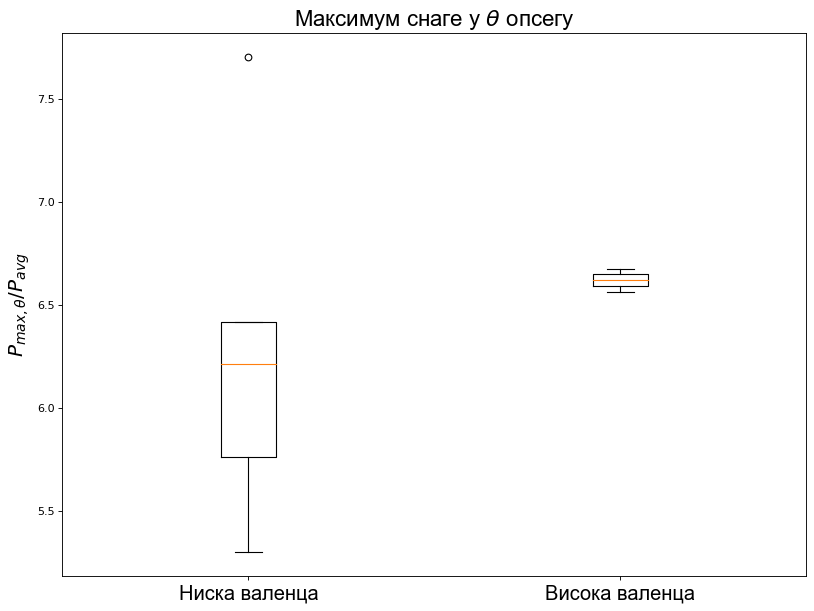

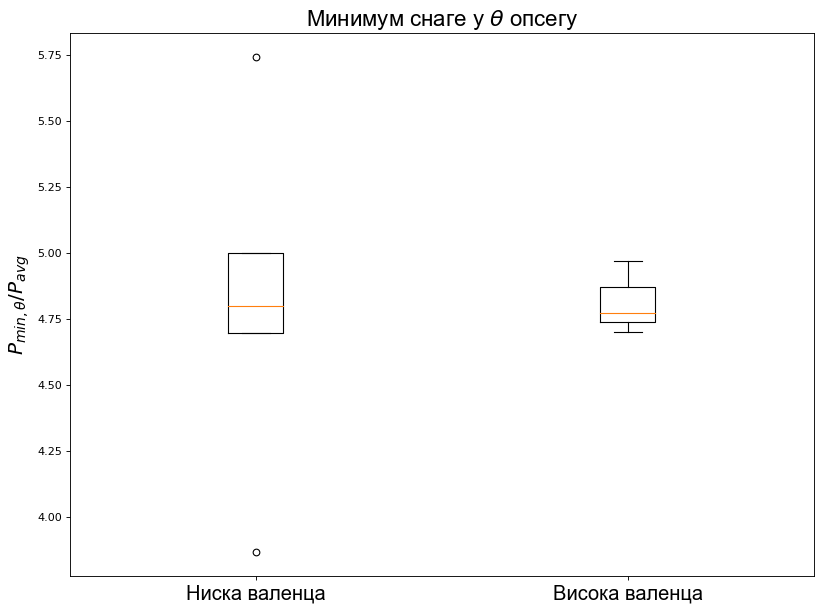

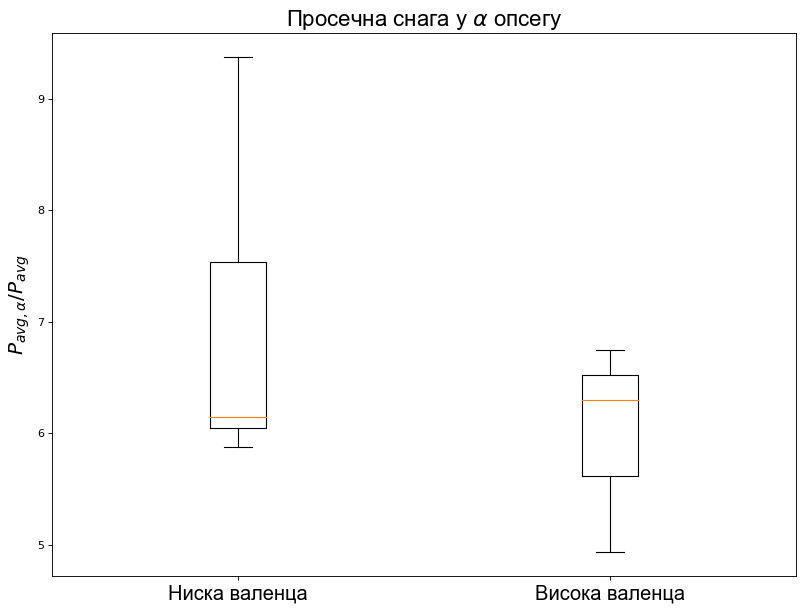

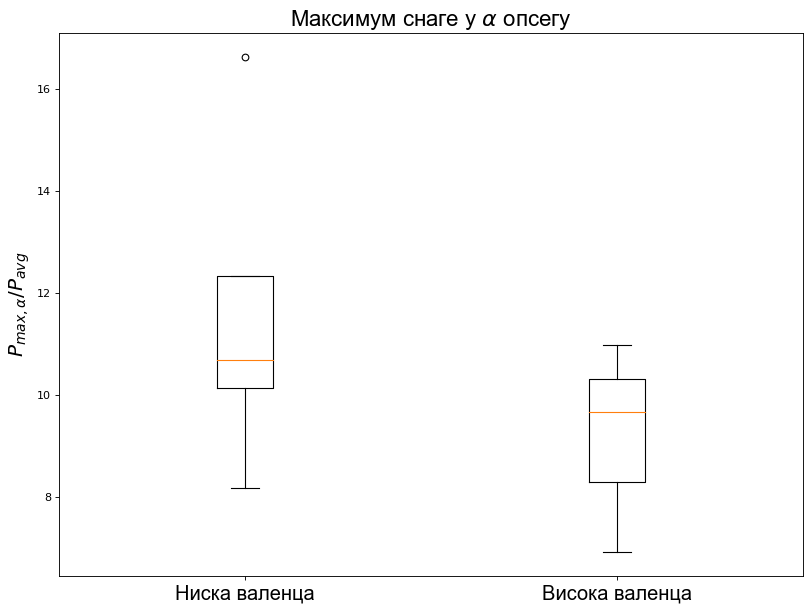

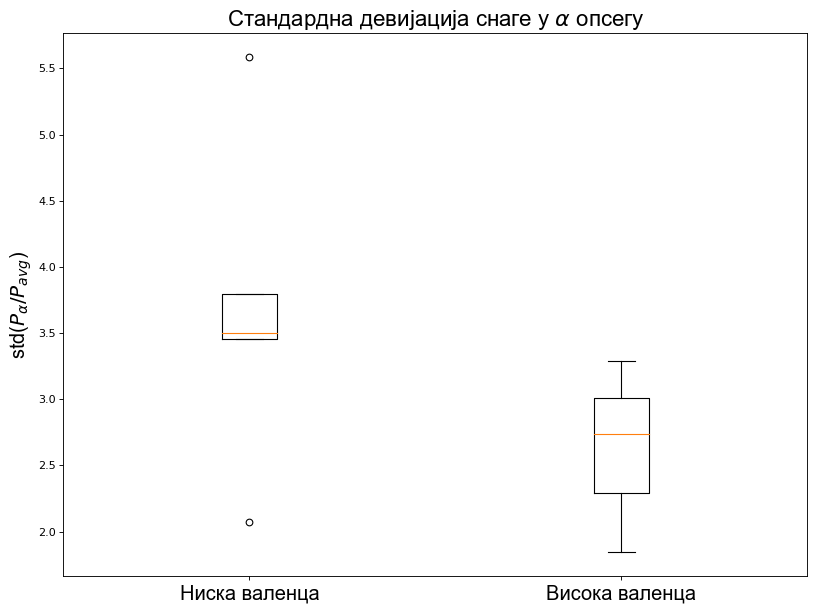

In [46]:
%matplotlib inline
names = [r'Просечна снага у $\theta$ опсегу', r'Минимум снаге у $\theta$ опсегу', r'Просечна снага у $\alpha$ опсегу', \
         r'Максимум снаге у $\alpha$ опсегу', r'Стандардна девијација снаге у $\alpha$ опсегу']
yaxisnames = [r'$P_{max, \theta}/P_{avg}$', r'$P_{min, \theta}/P_{avg}$', r'$P_{avg, \alpha}/P_{avg}$', r'$P_{max, \alpha}/P_{avg}$', \
              r'std($P_{\alpha}/P_{avg}$)']

for i in range(len(selected_features_valence)):
    keyname = selected_features_valence[i]
    posdata = positives[keyname].to_numpy()
    negdata = negatives[keyname].to_numpy()

    for_plot = [negdata, posdata]

    hfont = {'fontname':'Arial', 'fontsize':20}
    lfont = {'fontname':'Arial', 'fontsize':18}

    plt.figure(figsize=(12, 9), dpi=80)
    plt.title(names[i], **hfont)
    plt.ylabel(yaxisnames[i], **lfont)
    plt.boxplot(for_plot)
    plt.xticks([1, 2], ['Ниска валенца', 'Висока валенца'], **lfont)
    plt.savefig('Figures/Arousal/' + keyname + '.png', facecolor='white')

FEATURES FOR AROUSAL DETECTION

In [5]:
arousal_data = id_columns + selected_features_arousal.tolist()
arousal_f = data[arousal_data]
arousal_f = arousal_f.drop(['VALENCE'], axis=1)
positives = arousal_f.loc[arousal_f['AROUSAL']==0]
negatives = arousal_f.loc[arousal_f['AROUSAL']==1]

Plotting

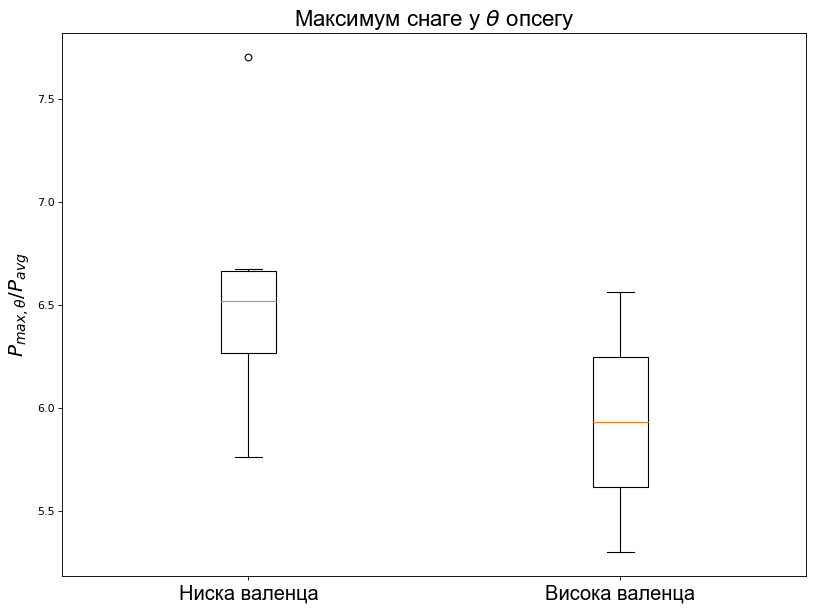

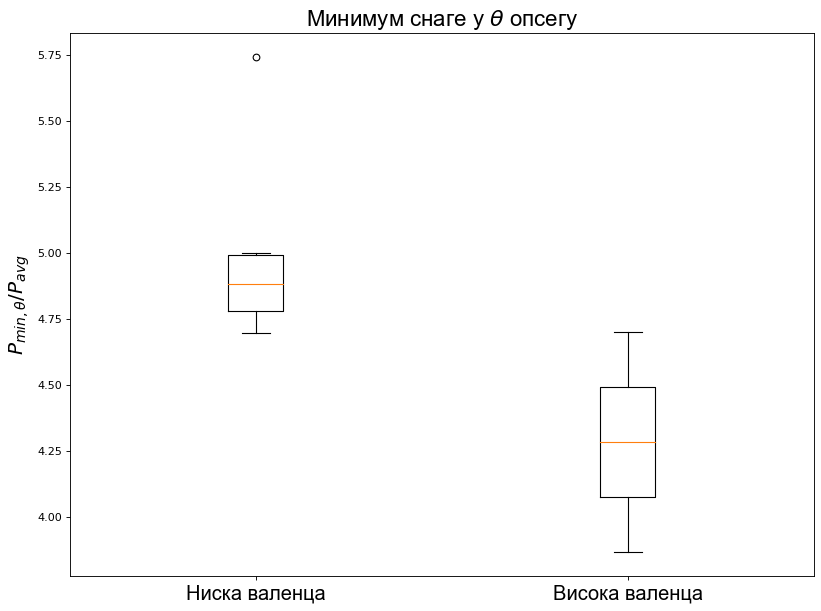

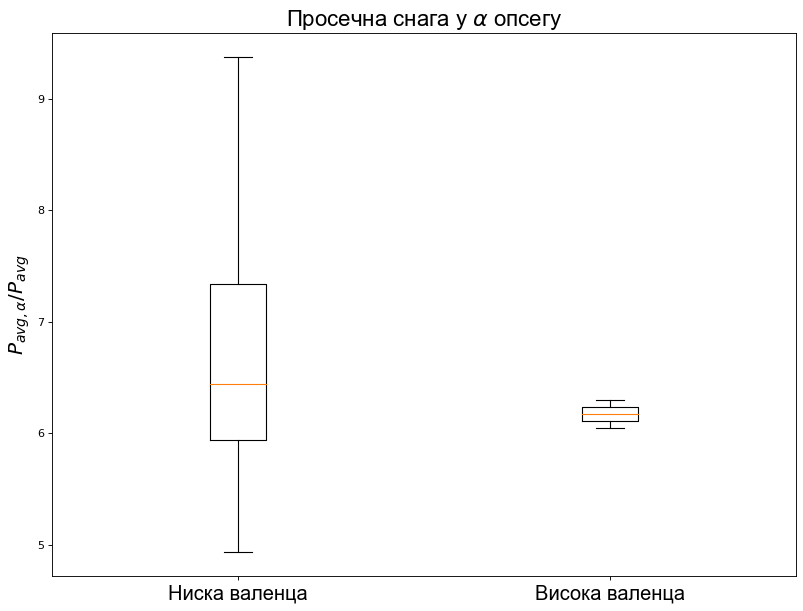

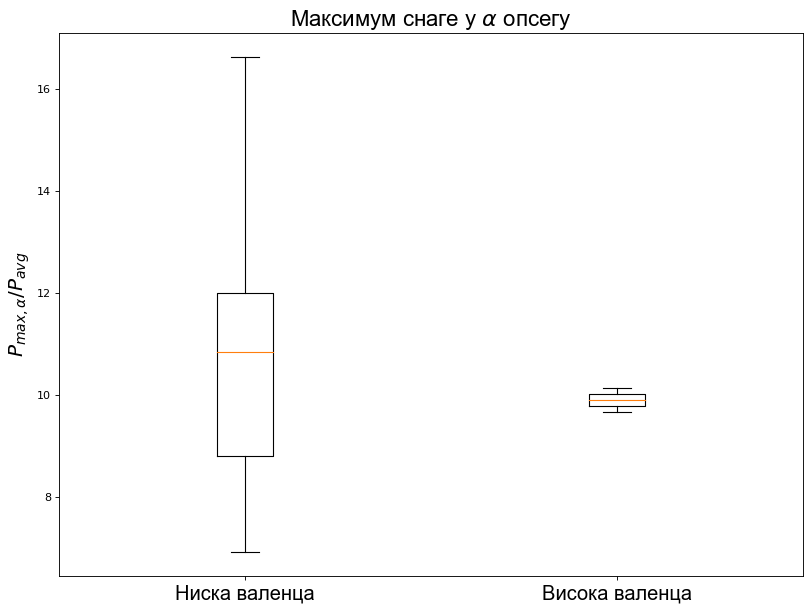

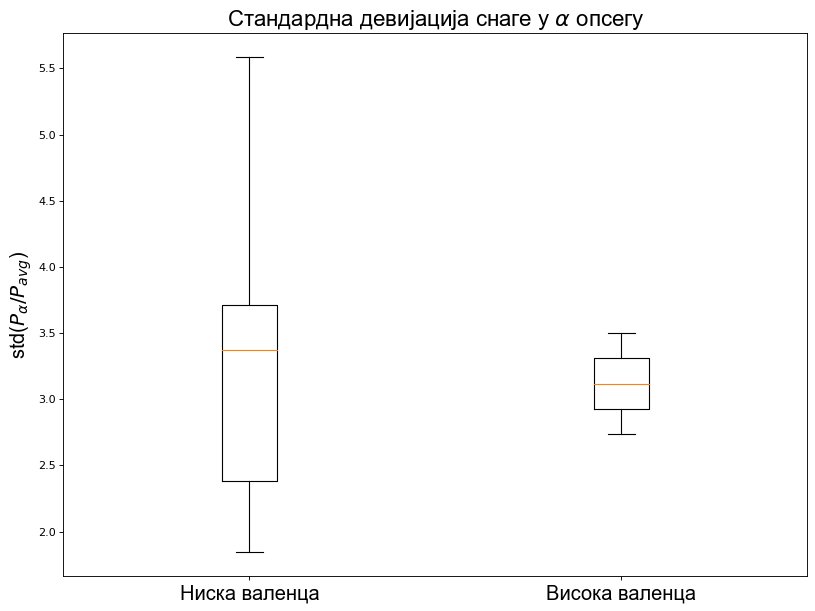

In [6]:
%matplotlib inline
names = [r'Максимум снаге у $\theta$ опсегу', r'Минимум снаге у $\theta$ опсегу', r'Просечна снага у $\alpha$ опсегу', \
         r'Максимум снаге у $\alpha$ опсегу', r'Стандардна девијација снаге у $\alpha$ опсегу']
yaxisnames = [r'$P_{max, \theta}/P_{avg}$', r'$P_{min, \theta}/P_{avg}$', r'$P_{avg, \alpha}/P_{avg}$', r'$P_{max, \alpha}/P_{avg}$', \
              r'std($P_{\alpha}/P_{avg}$)']

for i in range(len(selected_features_valence)):
    keyname = selected_features_valence[i]
    posdata = positives[keyname].to_numpy()
    negdata = negatives[keyname].to_numpy()

    for_plot = [negdata, posdata]

    hfont = {'fontname':'Arial', 'fontsize':20}
    lfont = {'fontname':'Arial', 'fontsize':18}

    plt.figure(figsize=(12, 9), dpi=80)
    plt.title(names[i], **hfont)
    plt.ylabel(yaxisnames[i], **lfont)
    plt.boxplot(for_plot)
    plt.xticks([1, 2], ['Ниска надраженост', 'Висока надраженост'], **lfont)
    plt.savefig('Figures/Valence/' + keyname + '.png', facecolor='white')